# Text Classification Assessment
This assessment is very much like the Text Classification Project we just completed, and the dataset is very similar.

The **moviereviews2.tsv** dataset contains the text of 6000 movie reviews. 3000 are positive, 3000 are negative, and the text has been preprocessed as a tab-delimited file. As before, labels are given as `pos` and `neg`.

We've included 20 reviews that contain either `NaN` data, or have strings made up of whitespace.

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

### Task #1: Perform imports and load the dataset into a pandas DataFrame
For this exercise you can load the dataset from `'../TextFiles/moviereviews2.tsv'`.

In [1]:

import pandas as pd

file_path = '../TextFiles/moviereviews2.tsv'
df = pd.read_csv(file_path, sep='\t')

df.head()

,label,review
0,pos,I loved this movie and will watch it again. Or...
1,pos,"A warm, touching movie that has a fantasy-like..."
2,pos,I was not expecting the powerful filmmaking ex...
3,neg,"This so-called ""documentary"" tries to tell tha..."
4,pos,This show has been my escape from reality for ...


### Task #2: Check for missing values:

In [2]:
# Check for NaN values:
nan_counts = df.isna().sum()
nan_counts

label      0
review    20
dtype: int64

In [3]:
# Check for whitespace strings (it's OK if there aren't any!):
def is_whitespace_string(x):
    if isinstance(x, str) and x.strip() == '':
        return True
    return False

whitespace_counts = df.applymap(is_whitespace_string).sum()

whitespace_counts

C:\Users\USER\AppData\Local\Temp\ipykernel_5140\2622649160.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  whitespace_counts = df.applymap(is_whitespace_string).sum()


label     0
review    0
dtype: int64

### Task #3: Remove NaN values:

In [4]:
df_cleaned = df.dropna()

original_shape = df.shape
cleaned_shape = df_cleaned.shape

print(f'Original DataFrame shape: {original_shape}')
print(f'Cleaned DataFrame shape: {cleaned_shape}')

Original DataFrame shape: (6000, 2)
Cleaned DataFrame shape: (5980, 2)


### Task #4: Take a quick look at the `label` column:

In [5]:
label_distribution = df_cleaned['label'].value_counts()

label_distribution

label
pos    2990
neg    2990
Name: count, dtype: int64

### Task #5: Split the data into train & test sets:
You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.33, random_state=42`

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_cleaned.drop('label', axis=1), 
                                                    df_cleaned['label'], 
                                                    test_size=0.33, 
                                                    random_state=42)

print(f'Training set shape: {X_train.shape}')
print(f'Test set shape: {X_test.shape}')

Training set shape: (4006, 1)
Test set shape: (1974, 1)


### Task #6: Build a pipeline to vectorize the date, then train and fit a model
You may use whatever model you like. To compare your results to the solution notebook, use `LinearSVC`.

In [8]:
X_test.head()

,review
4093,Perhaps I couldn't find the DVD menu selection...
5028,Wow this was a movie was completely captivatin...
4849,I first saw this movie here in the U.K. in Dec...
2802,It's such a shame that because of it's title t...
167,"I would love to comment on this film. Alas , m..."


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

# Create a pipeline with TfidfVectorizer and LinearSVC
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Step 1: Vectorize the text data
    ('classifier', LinearSVC())    # Step 2: Train a LinearSVC model
])

X_train_text = X_train['review']

pipeline.fit(X_train_text, y_train)

c:\Users\USER\Desktop\NLP\NLPEnv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', LinearSVC())])

### Task #7: Run predictions and analyze the results

In [10]:
# Form a prediction set
X_test_text = X_test['review']

predictions = pipeline.predict(X_test_text)

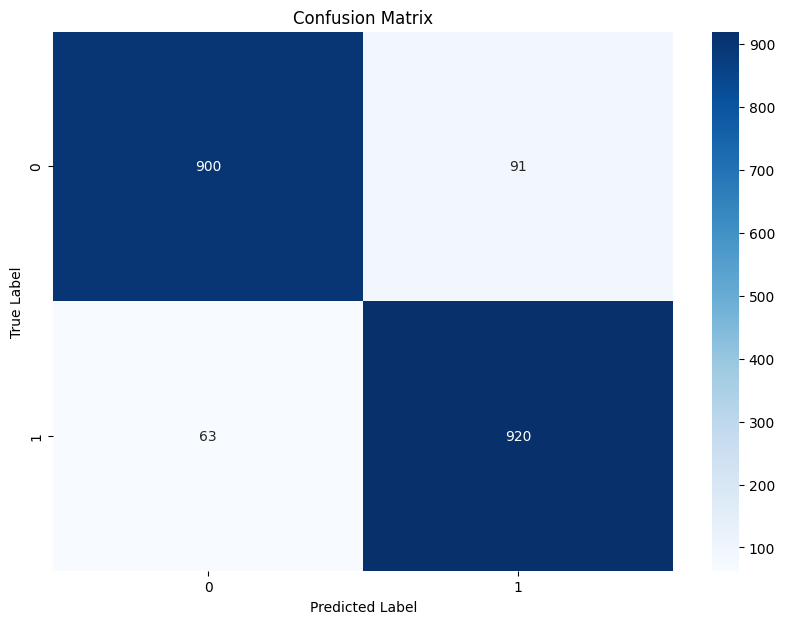

In [11]:
# Report the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [12]:
# Print a classification report
from sklearn.metrics import classification_report
class_report = classification_report(y_test, predictions)
print(class_report)

              precision    recall  f1-score   support

         neg       0.93      0.91      0.92       991
         pos       0.91      0.94      0.92       983

    accuracy                           0.92      1974
   macro avg       0.92      0.92      0.92      1974
weighted avg       0.92      0.92      0.92      1974



In [13]:
# Print the overall accuracy
from sklearn.metrics import accuracy_score

overall_accuracy = accuracy_score(y_test, predictions)

print(f'Overall accuracy: {overall_accuracy:.2%}')

Overall accuracy: 92.20%
